In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn import cluster
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# import datasets


In [ ]:
# introducing the first and the main dataset, transaction dataset

df1 = pd.read_csv (r'D:\Revou\Project Group\Dataset\transaction data\transaction_data.csv')
df1

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.00,0.00
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.00,0.00
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.00,0.00
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.00,0.00


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [ ]:
#introduce new dataset to complete the main dataset --> product, coupon, and coupon_redempt dataset

df2= pd.read_csv (r'D:\Revou\Project Group\Dataset\product.csv')
df3= pd.read_csv (r'D:\Revou\Project Group\Dataset\coupon.csv')
df4= pd.read_csv (r'D:\Revou\Project Group\Dataset\coupon_redempt.csv')

In [ ]:
df3.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [ ]:
df4.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [ ]:
#combine df3 and df4
df3_4 = df3.merge(df4, how='inner', on=('COUPON_UPC','CAMPAIGN'))
df3_4

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,household_key,DAY
0,10000089064,27754,9,321,446
1,10000089064,27754,9,1773,439
2,10000089064,243186,9,321,446
3,10000089064,243186,9,1773,439
4,10000089064,872316,9,321,446
...,...,...,...,...,...
2198357,10000089283,1073718,18,2496,592
2198358,10000089283,2194375,18,2496,592
2198359,10000089283,1095926,18,2496,592
2198360,10000089283,1056267,18,2496,592


In [ ]:
df1_2 = df1.merge(df2, how='left', on='PRODUCT_ID')
df1_2

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.00,0.00,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.00,0.00,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.00,0.00,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.00,0.00,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ


In [ ]:
df1_2.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [ ]:
df3_4.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,household_key,DAY
0,10000089064,27754,9,321,446
1,10000089064,27754,9,1773,439
2,10000089064,243186,9,321,446
3,10000089064,243186,9,1773,439
4,10000089064,872316,9,321,446


In [ ]:
df = df1_2.merge(df3_4, how='left', on=('household_key','DAY','PRODUCT_ID'))
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,NaN,NaN
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,NaN,NaN
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,NaN,NaN
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,NaN,NaN
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595909,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.00,0.00,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ,NaN,NaN
2595910,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.00,0.00,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,NaN,NaN
2595911,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.00,0.00,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,NaN,NaN
2595912,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.00,0.00,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ,NaN,NaN


In [ ]:
df.isnull().sum()

household_key                 0
BASKET_ID                     0
DAY                           0
PRODUCT_ID                    0
QUANTITY                      0
SALES_VALUE                   0
STORE_ID                      0
RETAIL_DISC                   0
TRANS_TIME                    0
WEEK_NO                       0
COUPON_DISC                   0
COUPON_MATCH_DISC             0
MANUFACTURER                  0
DEPARTMENT                    0
BRAND                         0
COMMODITY_DESC                0
SUB_COMMODITY_DESC            0
CURR_SIZE_OF_PRODUCT          0
COUPON_UPC              2591522
CAMPAIGN                2591522
dtype: int64

In [ ]:
#convert categorical data into string data

df = df.astype({'household_key':'str',
                'BASKET_ID':'str',
                'PRODUCT_ID':'str',
                'STORE_ID':'str',
                'MANUFACTURER':'str',
                'COUPON_UPC': 'str',
                'CAMPAIGN': 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595914 entries, 0 to 2595913
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         object 
 1   BASKET_ID             object 
 2   DAY                   int64  
 3   PRODUCT_ID            object 
 4   QUANTITY              int64  
 5   SALES_VALUE           float64
 6   STORE_ID              object 
 7   RETAIL_DISC           float64
 8   TRANS_TIME            int64  
 9   WEEK_NO               int64  
 10  COUPON_DISC           float64
 11  COUPON_MATCH_DISC     float64
 12  MANUFACTURER          object 
 13  DEPARTMENT            object 
 14  BRAND                 object 
 15  COMMODITY_DESC        object 
 16  SUB_COMMODITY_DESC    object 
 17  CURR_SIZE_OF_PRODUCT  object 
 18  COUPON_UPC            object 
 19  CAMPAIGN              object 
dtypes: float64(4), int64(4), object(12)
memory usage: 415.9+ MB


# CLEANING DATASET

In [ ]:
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,nan,nan
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,nan,nan
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,nan,nan
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,nan,nan
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595909,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.00,0.00,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ,nan,nan
2595910,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.00,0.00,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,nan,nan
2595911,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.00,0.00,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,nan,nan
2595912,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.00,0.00,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ,nan,nan


In [ ]:
#check null values

pd.isnull(df).sum()

household_key           0
BASKET_ID               0
DAY                     0
PRODUCT_ID              0
QUANTITY                0
SALES_VALUE             0
STORE_ID                0
RETAIL_DISC             0
TRANS_TIME              0
WEEK_NO                 0
COUPON_DISC             0
COUPON_MATCH_DISC       0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
COUPON_UPC              0
CAMPAIGN                0
dtype: int64

In [ ]:
# describing numerical data for initial observation

df[['QUANTITY','SALES_VALUE','RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC']].describe()

,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC
count,2595914.00,2595914.00,2595914.00,2595914.00,2595914.00
mean,100.42,3.10,-0.54,-0.02,-0.00
std,1153.40,4.18,1.25,0.22,0.04
min,0.00,0.00,-180.00,-55.93,-7.70
25%,1.00,1.29,-0.69,0.00,0.00
50%,1.00,2.00,-0.01,0.00,0.00
75%,1.00,3.49,0.00,0.00,0.00
max,89638.00,840.00,3.99,0.00,0.00


In [ ]:
# after observation, there are quantity with 0 data. these data will be dropped.

quantity_dropped = df['QUANTITY'] == 0
df = df[~(quantity_dropped)]
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,nan,nan
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,nan,nan
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,nan,nan
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,nan,nan
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595909,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.00,0.00,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ,nan,nan
2595910,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.00,0.00,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,nan,nan
2595911,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.00,0.00,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,nan,nan
2595912,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.00,0.00,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ,nan,nan


In [ ]:
# After observation from describe function, there are RETAIL_DISC with value > 0 where in fact they must be below 0.
# These data will be dropped.

retail_disc_drop = df['RETAIL_DISC'] > 0
df = df[~(retail_disc_drop)]
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,nan,nan
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,nan,nan
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,nan,nan
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,nan,nan
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595909,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.00,0.00,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ,nan,nan
2595910,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.00,0.00,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,nan,nan
2595911,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.00,0.00,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,nan,nan
2595912,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.00,0.00,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ,nan,nan


In [ ]:
# describing categorical data for initial observation

df[['household_key', 'BASKET_ID', 'PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC']].describe()

,household_key,BASKET_ID,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
count,2581442,2581442,2581442,2581442,2581442,2581442,2581442,2581442
unique,2500,275889,92015,6453,43,2,307,2373
top,718,30983766334,1082185,69,GROCERY,National,SOFT DRINKS,FLUID MILK WHITE ONLY
freq,6778,168,29757,730865,1643655,1836550,117216,65666


In [ ]:
#make new df by grouping BASKET_ID

basket = df.groupby([df['BASKET_ID'],
                     df['household_key'],
                     df['DAY'],
                     df['TRANS_TIME'],
                     df['STORE_ID']]).agg({'SALES_VALUE' : 'sum',
                                      'QUANTITY' : 'sum',
                                      'RETAIL_DISC': 'sum',
                                      'COUPON_DISC': 'sum',
                                      'COUPON_MATCH_DISC': 'sum'})
df_basket = basket.reset_index()
df_basket

,BASKET_ID,household_key,DAY,TRANS_TIME,STORE_ID,SALES_VALUE,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC
0,26984851472,2375,1,1631,364,5.91,5,-1.29,0.00,0.00
1,26984851516,2375,1,1642,364,12.43,7,-3.26,0.00,0.00
2,26984896261,1364,1,1520,31742,11.37,5,-2.18,0.00,0.00
3,26984905972,1130,1,1340,31642,2.55,9,-2.08,0.00,0.00
4,26984945254,1173,1,2042,412,3.53,4,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
275884,42302712006,2262,711,1652,446,9.78,4,-1.79,0.00,0.00
275885,42302712189,1369,711,1730,446,33.64,6,-1.10,0.00,0.00
275886,42302712298,2225,711,1754,446,40.70,11,-0.39,0.00,0.00
275887,42305362497,1598,711,1516,3228,5.61,6,-2.22,0.00,0.00


In [ ]:
df_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275889 entries, 0 to 275888
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BASKET_ID          275889 non-null  object 
 1   household_key      275889 non-null  object 
 2   DAY                275889 non-null  int64  
 3   TRANS_TIME         275889 non-null  int64  
 4   STORE_ID           275889 non-null  object 
 5   SALES_VALUE        275889 non-null  float64
 6   QUANTITY           275889 non-null  int64  
 7   RETAIL_DISC        275889 non-null  float64
 8   COUPON_DISC        275889 non-null  float64
 9   COUPON_MATCH_DISC  275889 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 21.0+ MB


In [ ]:
#adding three more columns

cust_purchase_value = df_basket['SALES_VALUE'] + df_basket['COUPON_DISC']
month_no = df_basket['DAY'].apply(lambda x: math.ceil(x/30))
day_no = df_basket['DAY'].apply(lambda x: x%7)

df_basket['cust_purchase_value'] = cust_purchase_value
df_basket['month_no'] = month_no
df_basket['day_no'] = day_no
df_basket

,BASKET_ID,household_key,DAY,TRANS_TIME,STORE_ID,SALES_VALUE,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,cust_purchase_value,month_no,day_no
0,26984851472,2375,1,1631,364,5.91,5,-1.29,0.00,0.00,5.91,1,1
1,26984851516,2375,1,1642,364,12.43,7,-3.26,0.00,0.00,12.43,1,1
2,26984896261,1364,1,1520,31742,11.37,5,-2.18,0.00,0.00,11.37,1,1
3,26984905972,1130,1,1340,31642,2.55,9,-2.08,0.00,0.00,2.55,1,1
4,26984945254,1173,1,2042,412,3.53,4,0.00,0.00,0.00,3.53,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275884,42302712006,2262,711,1652,446,9.78,4,-1.79,0.00,0.00,9.78,24,4
275885,42302712189,1369,711,1730,446,33.64,6,-1.10,0.00,0.00,33.64,24,4
275886,42302712298,2225,711,1754,446,40.70,11,-0.39,0.00,0.00,40.70,24,4
275887,42305362497,1598,711,1516,3228,5.61,6,-2.22,0.00,0.00,5.61,24,4


In [ ]:
# describing numerical data again to detect outliers

df_basket[['QUANTITY','SALES_VALUE']].describe()

,QUANTITY,SALES_VALUE
count,275889.00,275889.00
mean,944.89,29.21
std,3423.83,36.12
min,1.00,0.00
25%,3.00,6.98
50%,8.00,17.15
75%,22.00,36.35
max,89638.00,961.49


In [ ]:
# check outliers in SALES_VALUE

Q1_sales = df_basket['SALES_VALUE'].quantile(0.25)
Q3_sales = df_basket['SALES_VALUE'].quantile(0.75)

IQR = Q3_sales - Q1_sales
boxplot_min = Q1_sales - 1.5 * IQR
boxplot_max = Q3_sales + 1.5 * IQR

#removing outliers

filter_sales_min = df_basket['SALES_VALUE']<boxplot_min
filter_sales_max = df_basket['SALES_VALUE']>boxplot_max

df_basket[(filter_sales_min|filter_sales_max)].count()

BASKET_ID              22161
household_key          22161
DAY                    22161
TRANS_TIME             22161
STORE_ID               22161
SALES_VALUE            22161
QUANTITY               22161
RETAIL_DISC            22161
COUPON_DISC            22161
COUPON_MATCH_DISC      22161
cust_purchase_value    22161
month_no               22161
day_no                 22161
dtype: int64

since the 'SALES_VALUE' outliers is big (8%), we don't exclude all outliers. We will decide with boxplot.

In [ ]:
# check outliers in QUANTITY

Q1_quantity = df_basket['SALES_VALUE'].quantile(0.25)
Q3_quantity = df_basket['SALES_VALUE'].quantile(0.75)

IQR = Q3_quantity - Q1_quantity
boxplot_min = Q1_quantity - 1.5 * IQR
boxplot_max = Q3_quantity + 1.5 * IQR

#removing outliers

filter_qty_min = df_basket['QUANTITY']<boxplot_min
filter_qty_max = df_basket['QUANTITY']>boxplot_max

df_basket[(filter_qty_min|filter_qty_max)].count()

BASKET_ID              25684
household_key          25684
DAY                    25684
TRANS_TIME             25684
STORE_ID               25684
SALES_VALUE            25684
QUANTITY               25684
RETAIL_DISC            25684
COUPON_DISC            25684
COUPON_MATCH_DISC      25684
cust_purchase_value    25684
month_no               25684
day_no                 25684
dtype: int64

since the 'QUANTITY' outliers is big (9%), we don't exclude all the outliers. We will decide with boxplot.

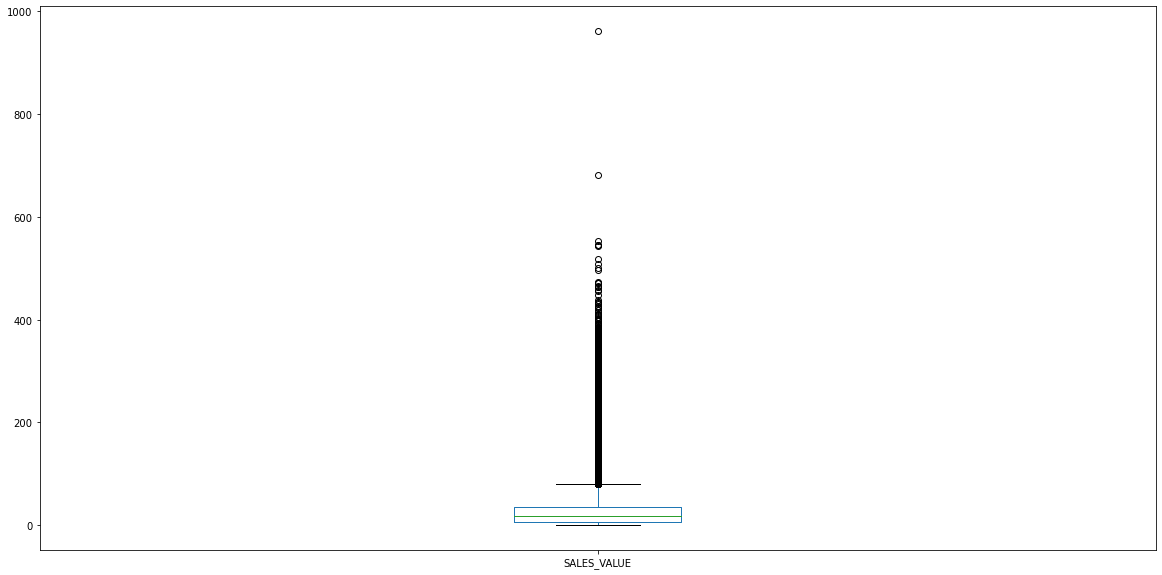

In [ ]:
cek = ['SALES_VALUE']
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
for i,el in enumerate(cek):
    a = df_basket.boxplot(el, grid=False)
plt.show()

We will exclude top 10 of 'SALES_VALUE'

In [ ]:
sales_outliers = sorted(df_basket["SALES_VALUE"], reverse=True)[:10]
sales_outliers

[961.49,
 681.58,
 552.92,
 545.17,
 545.07,
 543.83,
 518.01,
 508.58,
 499.99,
 497.02]

In [ ]:
df_basket = df_basket[df_basket['SALES_VALUE'] < 471.78]
df_basket

,BASKET_ID,household_key,DAY,TRANS_TIME,STORE_ID,SALES_VALUE,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,cust_purchase_value,month_no,day_no
0,26984851472,2375,1,1631,364,5.91,5,-1.29,0.00,0.00,5.91,1,1
1,26984851516,2375,1,1642,364,12.43,7,-3.26,0.00,0.00,12.43,1,1
2,26984896261,1364,1,1520,31742,11.37,5,-2.18,0.00,0.00,11.37,1,1
3,26984905972,1130,1,1340,31642,2.55,9,-2.08,0.00,0.00,2.55,1,1
4,26984945254,1173,1,2042,412,3.53,4,0.00,0.00,0.00,3.53,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275884,42302712006,2262,711,1652,446,9.78,4,-1.79,0.00,0.00,9.78,24,4
275885,42302712189,1369,711,1730,446,33.64,6,-1.10,0.00,0.00,33.64,24,4
275886,42302712298,2225,711,1754,446,40.70,11,-0.39,0.00,0.00,40.70,24,4
275887,42305362497,1598,711,1516,3228,5.61,6,-2.22,0.00,0.00,5.61,24,4


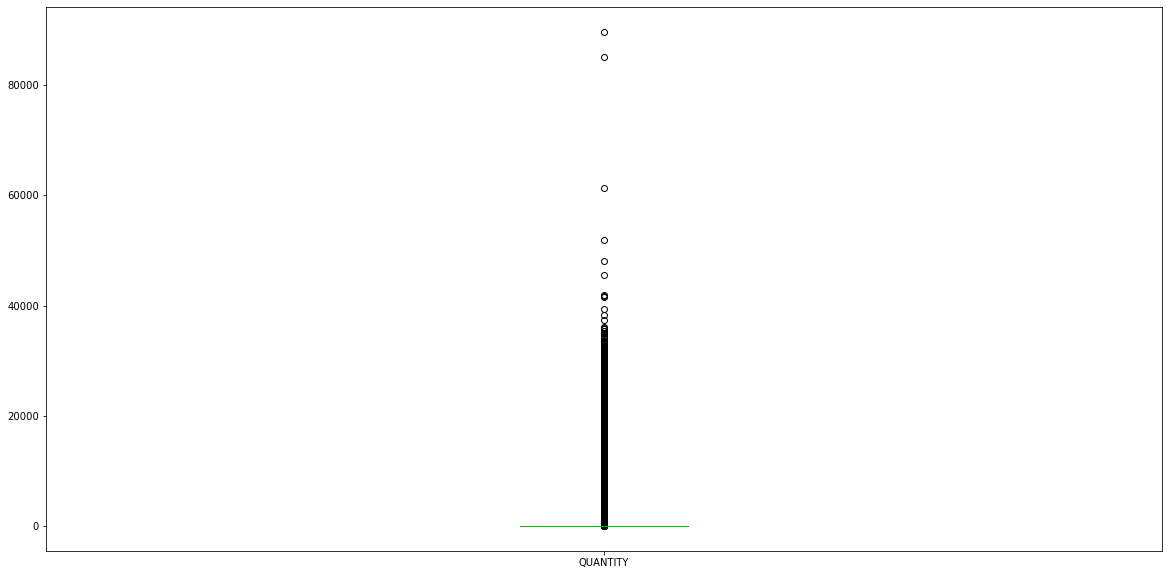

In [ ]:
cek = ['QUANTITY']
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
for i,el in enumerate(cek):
    a = df_basket.boxplot(el, grid=False)
plt.show()

In [ ]:
qty_outliers = sorted(df_basket["QUANTITY"], reverse=True)[:10]
qty_outliers

[89638, 85055, 61335, 51912, 48073, 45475, 41833, 41686, 41485, 39365]

In [ ]:
df_basket = df_basket[df_basket['QUANTITY'] < 39365]
df_basket

,BASKET_ID,household_key,DAY,TRANS_TIME,STORE_ID,SALES_VALUE,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,cust_purchase_value,month_no,day_no
0,26984851472,2375,1,1631,364,5.91,5,-1.29,0.00,0.00,5.91,1,1
1,26984851516,2375,1,1642,364,12.43,7,-3.26,0.00,0.00,12.43,1,1
2,26984896261,1364,1,1520,31742,11.37,5,-2.18,0.00,0.00,11.37,1,1
3,26984905972,1130,1,1340,31642,2.55,9,-2.08,0.00,0.00,2.55,1,1
4,26984945254,1173,1,2042,412,3.53,4,0.00,0.00,0.00,3.53,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275884,42302712006,2262,711,1652,446,9.78,4,-1.79,0.00,0.00,9.78,24,4
275885,42302712189,1369,711,1730,446,33.64,6,-1.10,0.00,0.00,33.64,24,4
275886,42302712298,2225,711,1754,446,40.70,11,-0.39,0.00,0.00,40.70,24,4
275887,42305362497,1598,711,1516,3228,5.61,6,-2.22,0.00,0.00,5.61,24,4


#DATA ANALYSIS (EDA)

# STORE CAGR

In [ ]:
df_store = df.copy()
df_store

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,nan,nan
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB,nan,nan
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,,nan,nan
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,nan,nan
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595909,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.00,0.00,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ,nan,nan
2595910,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.00,0.00,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,nan,nan
2595911,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.00,0.00,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,nan,nan
2595912,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.00,0.00,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ,nan,nan


In [ ]:
df_basket.head()

,BASKET_ID,household_key,DAY,TRANS_TIME,STORE_ID,SALES_VALUE,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,cust_purchase_value,month_no,day_no
0,26984851472,2375,1,1631,364,5.91,5,-1.29,0.00,0.00,5.91,1,1
1,26984851516,2375,1,1642,364,12.43,7,-3.26,0.00,0.00,12.43,1,1
2,26984896261,1364,1,1520,31742,11.37,5,-2.18,0.00,0.00,11.37,1,1
3,26984905972,1130,1,1340,31642,2.55,9,-2.08,0.00,0.00,2.55,1,1
4,26984945254,1173,1,2042,412,3.53,4,0.00,0.00,0.00,3.53,1,1


In [ ]:
#viz total sales per day

sales_per_day = df_basket.groupby(df_basket['day_no'])['SALES_VALUE'].sum()
sales_per_day

day_no
0   1019525.96
1   1005570.80
2   1016774.82
3   1127786.12
4   1365842.03
5   1404235.51
6   1110142.75
Name: SALES_VALUE, dtype: float64

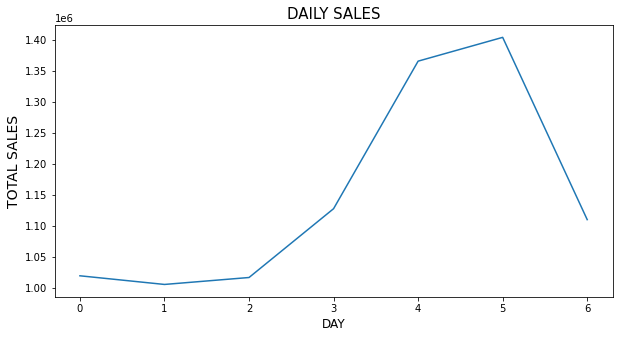

In [ ]:
plt.figure(figsize=(10,5))
plt.title('DAILY SALES',fontsize=15)
plt.xlabel('DAY',fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('TOTAL SALES',fontsize=14)
plt.yticks(fontsize=10)
plt.plot(sales_per_day)

In [ ]:
#viz total basket per day

basket_per_day = df_basket.groupby(df_basket['day_no'])['BASKET_ID'].count()
basket_per_day

day_no
0    36715
1    36932
2    37166
3    38487
4    44031
5    43846
6    38690
Name: BASKET_ID, dtype: int64

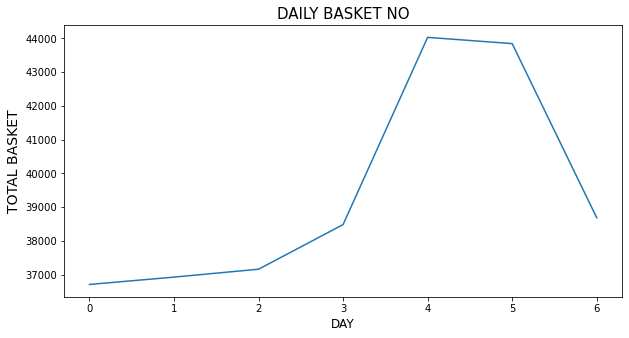

In [ ]:
plt.figure(figsize=(10,5))
plt.title('DAILY BASKET NO',fontsize=15)
plt.xlabel('DAY',fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('TOTAL BASKET',fontsize=14)
plt.yticks(fontsize=10)
plt.plot(basket_per_day)

In [ ]:
#viz total sales per month

sales_per_month = df_basket.groupby(df_basket['month_no'])['SALES_VALUE'].sum()
sales_per_month

month_no
1     55507.41
2    120996.64
3    214806.77
4    317712.82
5    341839.33
6    358587.39
7    346706.11
8    340675.89
9    373060.11
10   379667.63
11   368620.22
12   362034.15
13   376464.62
14   377679.14
15   384485.77
16   378282.35
17   381468.31
18   367188.86
19   362023.33
20   383003.91
21   390619.95
22   400031.87
23   396377.25
24   272038.16
Name: SALES_VALUE, dtype: float64

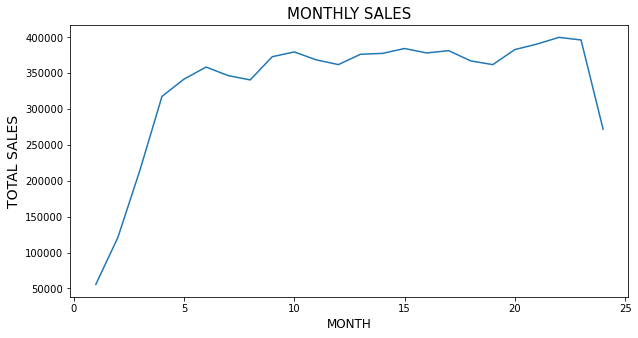

In [ ]:
plt.figure(figsize=(10,5))
plt.title('MONTHLY SALES',fontsize=15)
plt.xlabel('MONTH',fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('TOTAL SALES',fontsize=14)
plt.yticks(fontsize=10)
plt.plot(sales_per_month)

In [ ]:
#viz total basket per month

basket_per_month = df_basket.groupby(df_basket['month_no'])['BASKET_ID'].count()
basket_per_month

month_no
1      1885
2      4283
3      7992
4     11983
5     12989
6     12987
7     12226
8     12298
9     12554
10    12429
11    12671
12    12422
13    12687
14    12902
15    13124
16    13235
17    13180
18    12625
19    12634
20    12848
21    12608
22    12559
23    12388
24     8358
Name: BASKET_ID, dtype: int64

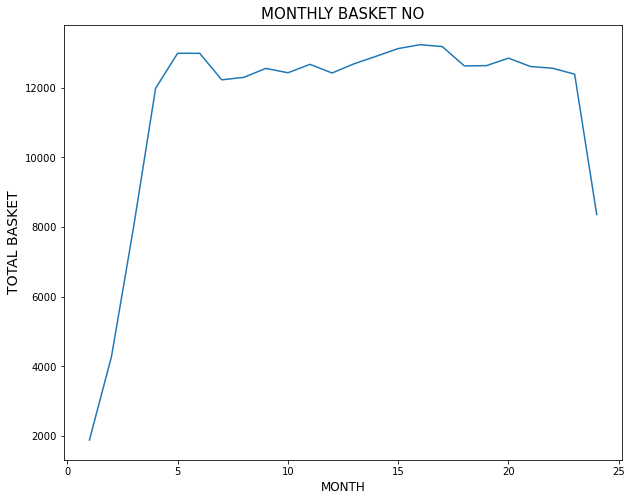

In [ ]:
plt.figure(figsize=(10,8))
plt.title('MONTHLY BASKET NO',fontsize=15)
plt.xlabel('MONTH',fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('TOTAL BASKET',fontsize=14)
plt.yticks(fontsize=10)
plt.plot(basket_per_month)

In [ ]:
# customer groups
df_customer = df_basket.groupby('household_key').agg({'BASKET_ID' : lambda x: x.nunique(),
                                                   'cust_purchase_value' : 'sum',
                                                   'QUANTITY' : 'sum',
                                                   'RETAIL_DISC' : 'sum',
                                                   'COUPON_DISC' : 'sum',
                                                   'COUPON_MATCH_DISC' : 'sum',
                                                   'DAY': 'max'
                                                   }).rename(columns={'BASKET_ID':'TOTAL_BASKET'})
df_customer = df_customer.reset_index()
df_customer

,household_key,TOTAL_BASKET,cust_purchase_value,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,DAY
0,1,85,4264.63,2000,-700.63,-75.31,-26.15,706
1,10,9,234.34,108,-24.84,0.00,0.00,685
2,100,33,2289.12,139469,-388.27,-5.50,-0.50,691
3,1000,138,4149.01,82609,-544.84,-1.75,-0.25,706
4,1001,90,4068.11,1736,-462.55,-13.89,-4.80,710
...,...,...,...,...,...,...,...,...
2495,995,21,1216.16,423,-186.34,-1.00,0.00,703
2496,996,139,2183.85,7844,-470.08,-37.00,0.00,711
2497,997,92,4645.31,105525,-446.15,-1.50,-0.50,711
2498,998,250,8260.80,288410,-1934.39,-44.59,-8.90,703


In [ ]:
avg_basket_value = df_customer['cust_purchase_value'] / df_customer['TOTAL_BASKET']
avg_qty_per_basket = df_customer['QUANTITY'] / df_customer['TOTAL_BASKET']
total_disc = (df_customer['RETAIL_DISC'] + df_customer['COUPON_DISC'] + df_customer['COUPON_MATCH_DISC'])*(-1)
recency = 711 - df_customer['DAY']

df_customer['avg_basket_value'] = avg_basket_value
df_customer['avg_qty_per_basket'] = avg_qty_per_basket
df_customer['total_disc'] = total_disc
df_customer['recency'] = recency
df_customer

,household_key,TOTAL_BASKET,cust_purchase_value,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,DAY,avg_basket_value,avg_qty_per_basket,total_disc,recency
0,1,85,4264.63,2000,-700.63,-75.31,-26.15,706,50.17,23.53,802.09,5
1,10,9,234.34,108,-24.84,0.00,0.00,685,26.04,12.00,24.84,26
2,100,33,2289.12,139469,-388.27,-5.50,-0.50,691,69.37,4226.33,394.27,20
3,1000,138,4149.01,82609,-544.84,-1.75,-0.25,706,30.07,598.62,546.84,5
4,1001,90,4068.11,1736,-462.55,-13.89,-4.80,710,45.20,19.29,481.24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,995,21,1216.16,423,-186.34,-1.00,0.00,703,57.91,20.14,187.34,8
2496,996,139,2183.85,7844,-470.08,-37.00,0.00,711,15.71,56.43,507.08,0
2497,997,92,4645.31,105525,-446.15,-1.50,-0.50,711,50.49,1147.01,448.15,0
2498,998,250,8260.80,288410,-1934.39,-44.59,-8.90,703,33.04,1153.64,1987.88,8


In [ ]:
#customer clustering
customer_cluster = df_customer.copy()

In [ ]:
customer_cluster = customer_cluster.drop(columns = ['RETAIL_DISC',
                                                    'COUPON_DISC',
                                                    'COUPON_MATCH_DISC',
                                                    'DAY',
                                                    'avg_basket_value',
                                                    'avg_qty_per_basket'])
customer_cluster

,household_key,TOTAL_BASKET,cust_purchase_value,QUANTITY,total_disc,recency
0,1,85,4264.63,2000,802.09,5
1,10,9,234.34,108,24.84,26
2,100,33,2289.12,139469,394.27,20
3,1000,138,4149.01,82609,546.84,5
4,1001,90,4068.11,1736,481.24,1
...,...,...,...,...,...,...
2495,995,21,1216.16,423,187.34,8
2496,996,139,2183.85,7844,507.08,0
2497,997,92,4645.31,105525,448.15,0
2498,998,250,8260.80,288410,1987.88,8


In [ ]:
from silhoutte import silhoutte_analysis

In [ ]:
customer_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   household_key        2500 non-null   object 
 1   TOTAL_BASKET         2500 non-null   int64  
 2   cust_purchase_value  2500 non-null   float64
 3   QUANTITY             2500 non-null   int64  
 4   total_disc           2500 non-null   float64
 5   recency              2500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 117.3+ KB


In [ ]:
scaler = MinMaxScaler()
customer_cluster[['TOTAL_BASKET',
                  'cust_purchase_value',
                  'QUANTITY',
                  'total_disc',
                  'recency']] = scaler.fit_transform(customer_cluster[['TOTAL_BASKET',
                                                                        'cust_purchase_value',
                                                                        'QUANTITY',
                                                                        'total_disc',
                                                                        'recency']])
customer_cluster

,household_key,TOTAL_BASKET,cust_purchase_value,QUANTITY,total_disc,recency
0,1,0.06,0.11,0.00,0.16,0.01
1,10,0.01,0.01,0.00,0.00,0.04
2,100,0.02,0.06,0.03,0.08,0.03
3,1000,0.11,0.11,0.02,0.11,0.01
4,1001,0.07,0.11,0.00,0.10,0.00
...,...,...,...,...,...,...
2495,995,0.02,0.03,0.00,0.04,0.01
2496,996,0.11,0.06,0.00,0.10,0.00
2497,997,0.07,0.12,0.02,0.09,0.00
2498,998,0.19,0.22,0.06,0.40,0.01


<Figure size 1152x576 with 0 Axes>

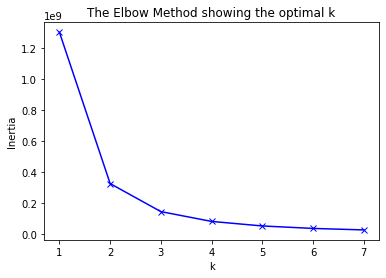

In [ ]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(customer_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
silhoutte_analysis(customer_cluster,range(2,9))

For n_clusters = 2 The average silhouette_score is : 0.6264340471825388
For n_clusters = 3 The average silhouette_score is : 0.5896974559268244
For n_clusters = 4 The average silhouette_score is : 0.5712411254311783
For n_clusters = 5 The average silhouette_score is : 0.5600750535566144
For n_clusters = 6 The average silhouette_score is : 0.5524513182184861
For n_clusters = 7 The average silhouette_score is : 0.5471284021959812
For n_clusters = 8 The average silhouette_score is : 0.5427725163121557


In [ ]:
cluster_model = cluster.KMeans(n_clusters=4, random_state = 2)
cluster_model.fit(customer_cluster)
cluster_label = cluster_model.labels_
df_customer['cluster'] = cluster_label
df_customer

In [ ]:
df_customer.groupby(['cluster']).agg(count = ('TOTAL_BASKET', lambda x: x.count()),
                            basket_median=('TOTAL_BASKET', lambda x: x.median()),
                            purchase_value_median=('cust_purchase_value', lambda x: x.median()),
                            QUANTITY_median =('QUANTITY', lambda x: x.median()),
                            total_disc_median=('total_disc', lambda x: x.median()),
                            recency_median=('recency', lambda x: x.median()),
                            )